# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.13.0'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [5]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

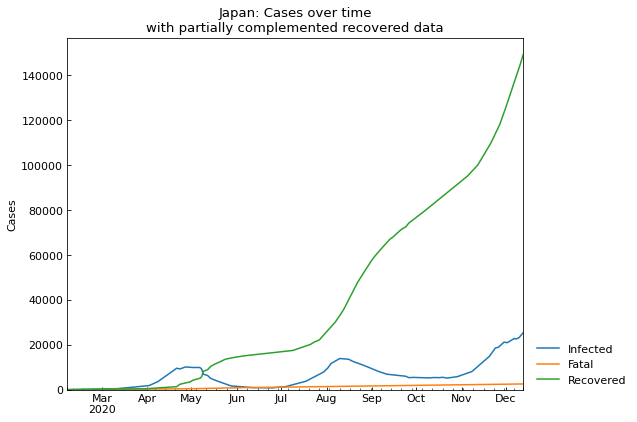

,Date,Confirmed,Infected,Fatal,Recovered
307,2020-12-09,165840,22798,2420,140622
308,2020-12-10,168573,23102,2465,143006
309,2020-12-11,171542,24026,2502,145014
310,2020-12-12,174299,24241,2534,147524
311,2020-12-13,177287,25439,2562,149286


In [6]:
record_df = snl.records()
record_df.tail()

We can calculate the number of new cases with `Scenario.record_diff()` method.

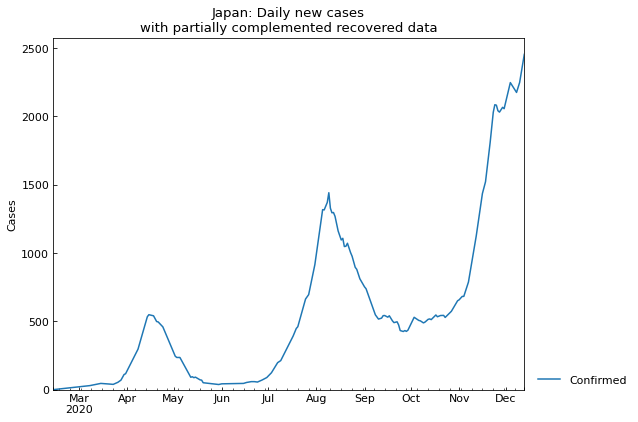

In [7]:
_ = snl.records_diff(variables=["Confirmed"], window=7)

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

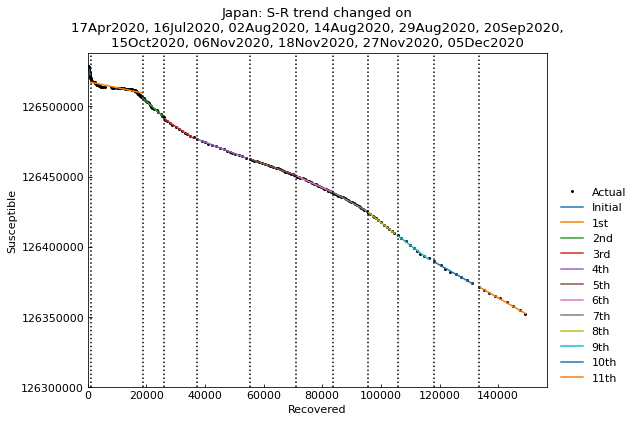

,Type,Start,End,Population
0th,Past,06Feb2020,16Apr2020,126529100
1st,Past,17Apr2020,15Jul2020,126529100
2nd,Past,16Jul2020,01Aug2020,126529100
3rd,Past,02Aug2020,13Aug2020,126529100
4th,Past,14Aug2020,28Aug2020,126529100
5th,Past,29Aug2020,19Sep2020,126529100
6th,Past,20Sep2020,14Oct2020,126529100
7th,Past,15Oct2020,05Nov2020,126529100
8th,Past,06Nov2020,17Nov2020,126529100
9th,Past,18Nov2020,26Nov2020,126529100


In [8]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [9]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 9th phase (06Feb2020 - 16Apr2020): finished 2860 trials in 3 min  5 sec


	 2nd phase (29Aug2020 - 19Sep2020): finished  361 trials in 0 min 10 sec

	11th phase (06Nov2020 - 17Nov2020): finished  367 trials in 0 min 10 sec

	10th phase (16Jul2020 - 01Aug2020): finished  937 trials in 0 min 30 sec

	 1st phase (05Dec2020 - 13Dec2020): finished  652 trials in 0 min 20 sec

	 3rd phase (18Nov2020 - 26Nov2020): finished  361 trials in 0 min 10 sec

	 4th phase (27Nov2020 - 04Dec2020): finished  950 trials in 0 min 30 sec

	 7th phase (17Apr2020 - 15Jul2020): finished 3541 trials in 3 min  0 sec

	 0th phase (20Sep2020 - 14Oct2020): finished 3609 trials in 3 min  0 sec

	 8th phase (14Aug2020 - 28Aug2020): finished 1207 trials in 0 min 40 sec

	 5th phase (02Aug2020 - 13Aug2020): finished 3634 trials in 3 min  0 sec

	 6th phase (15Oct2020 - 05Nov2020): finished 3638 trials in 3 min  0 sec

Completed optimization. Total: 7 min  7 sec


In [10]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/alpha2 [day],alpha1 [-],1/beta [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,5.00,0.017916,0.000149,0.034414,0.006616,480,50,2242,0.018,9,0.258609,2860,3 min 5 sec
1st,Past,17Apr2020,15Jul2020,126529100,SIR-F,0.51,0.103931,0.000023,0.010274,0.017980,480,18,14781,0.104,32,0.354287,3541,3 min 0 sec
2nd,Past,16Jul2020,01Aug2020,126529100,SIR-F,1.94,0.000344,0.000079,0.047556,0.024392,480,13,4209,0.000,7,0.026211,937,0 min 30 sec
3rd,Past,02Aug2020,13Aug2020,126529100,SIR-F,1.62,0.000489,0.000106,0.035077,0.021526,480,15,3149,0.000,9,0.039939,3634,3 min 0 sec
4th,Past,14Aug2020,28Aug2020,126529100,SIR-F,0.82,0.000201,0.000273,0.026499,0.032127,480,10,1218,0.000,12,0.015243,1207,0 min 40 sec
5th,Past,29Aug2020,19Sep2020,126529100,SIR-F,0.76,0.018850,0.000048,0.025405,0.032549,480,10,6894,0.019,13,0.018714,361,0 min 10 sec
6th,Past,20Sep2020,14Oct2020,126529100,SIR-F,0.92,0.000137,0.000369,0.028606,0.030697,480,10,902,0.000,11,0.024374,3609,3 min 0 sec
7th,Past,15Oct2020,05Nov2020,126529100,SIR-F,1.10,0.001364,0.000348,0.035405,0.031661,480,10,956,0.001,9,0.028709,3638,3 min 0 sec
8th,Past,06Nov2020,17Nov2020,126529100,SIR-F,1.59,0.000079,0.000231,0.046889,0.029302,480,11,1442,0.000,7,0.011004,367,0 min 10 sec
9th,Past,18Nov2020,26Nov2020,126529100,SIR-F,1.57,0.000197,0.000257,0.043082,0.027123,480,12,1299,0.000,7,0.026086,361,0 min 10 sec


### Accuracy of estimation

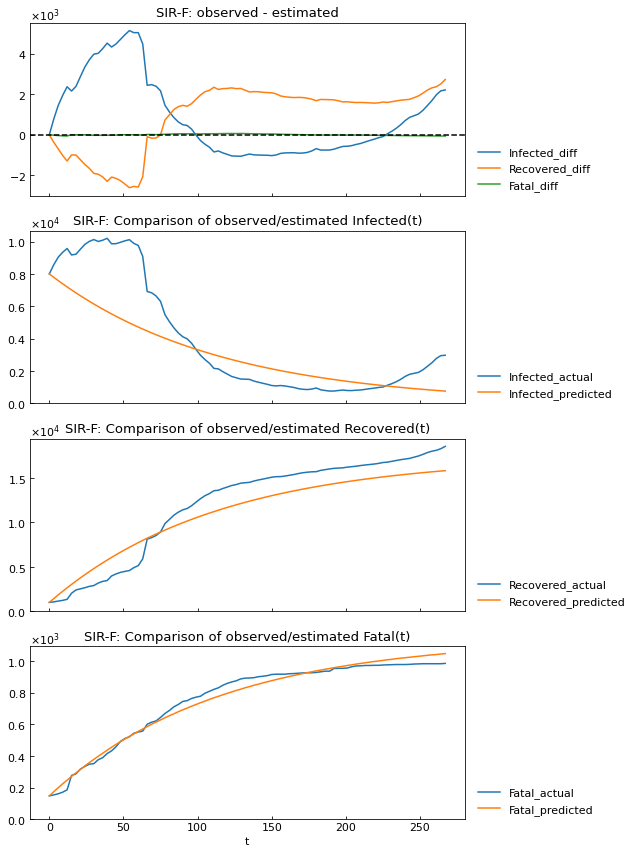

In [11]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [12]:
snl.get("Rt", phase="4th")

0.82

### Show parameter history

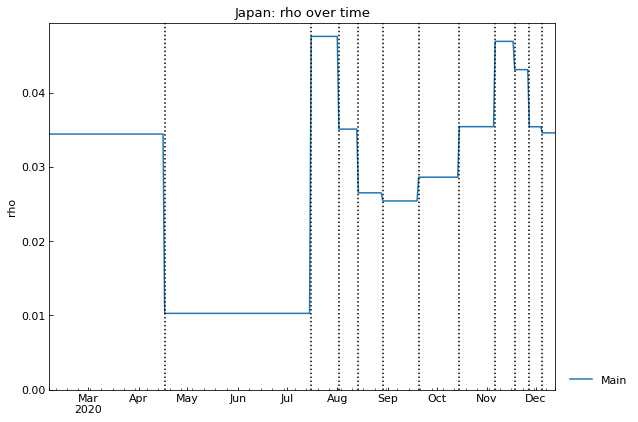

In [13]:
_ = snl.history(target="rho")

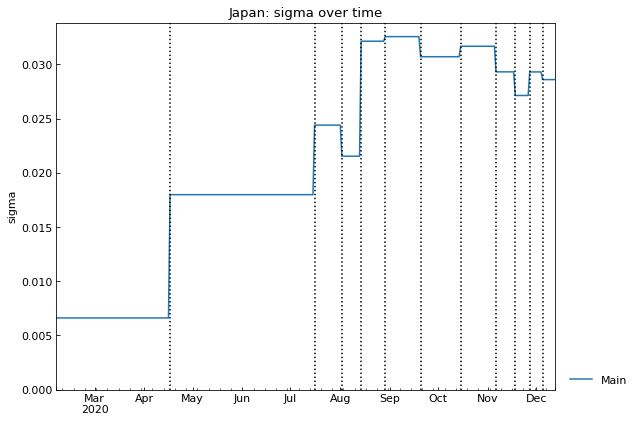

In [14]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

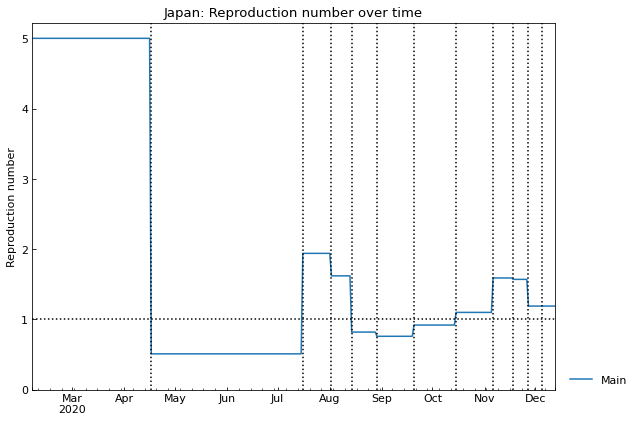

In [15]:
_ = snl.history(target="Rt")

### Simulate the number of cases

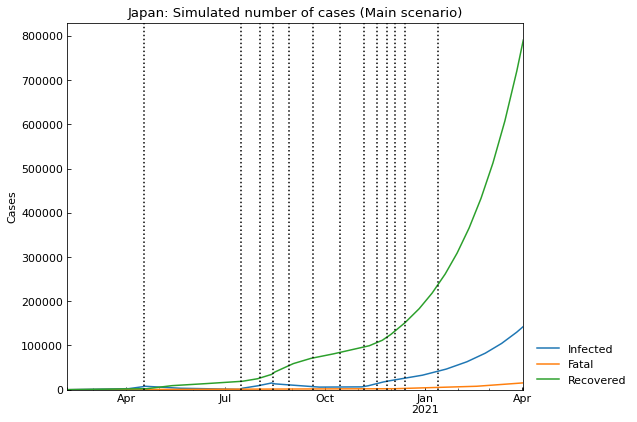

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,891709,14518,134234,742957
418,2021-03-30,905638,14751,136329,754558
419,2021-03-31,919785,14988,138456,766341
420,2021-04-01,934151,15228,140615,778308
421,2021-04-02,948738,15472,142805,790461


In [16]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [17]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.028587326796987673

In [18]:
sigma_new = sigma_current * 2
sigma_new

0.05717465359397535

In [19]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  5.00   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.51   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.94   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.62   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.82   
         5th      Past  29Aug2020  19Sep2020   126529100  SIR-F  0.76   
         6th      Past  20Sep2020  14Oct2020   126529100  SIR-F  0.92   
         7th      Past  15Oct2020  05Nov2020   126529100  SIR-F  1.10   
         8th      Past  06Nov2020  17Nov2020   126529100  SIR-F  1.59   
         9th      Past  18Nov2020  26Nov2020   126529100  SIR-F  1.57   
         10th     Past  27Nov2020  04Dec2020   126529100  SIR-F  1.19   
         11th     Past  05Dec2020  13Dec2020   126529100  SIR-F  1.19   
         12th   Future  14Dec2020  12Jan2021   126529100  SIR-F  1.19   
         13th   Future  13Jan2021  01Apr2021   126529100  SIR-F  1.19   
Medicine 0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  5.00   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.51   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.94   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.62   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.82   
         5th      Past  29Aug2020  19Sep2020   126529100  SIR-F  0.76   
         6th      Past  20Sep2020  14Oct2020   126529100  SIR-F  0.92   
         7th      Past  15Oct2020  05Nov2020   126529100  SIR-F  1.10   
         8th      Past  06Nov2020  17Nov2020   126529100  SIR-F  1.59   
         9th      Past  18Nov2020  26Nov2020   126529100  SIR-F  1.57   
         10th     Past  27Nov2020  04Dec2020   126529100  SIR-F  1.19   
         11th     Past  05Dec2020  13Dec2020   126529100  SIR-F  1.19   
         12th   Future  14Dec2020  12Jan2021   126529100  SIR-F  1.19   
         13th   Future  13Jan2021  01Apr2021   126529100  SIR-F  0.60   

                   theta     kappa       rho     sigma  tau  1/gamma [day]  \
Scenario Phase                                                               
Main     0th    0.017916  0.000149  0.034414  0.006616  480             50   
         1st    0.103931  0.000023  0.010274  0.017980  480             18   
         2nd    0.000344  0.000079  0.047556  0.024392  480             13   
         3rd    0.000489  0.000106  0.035077  0.021526  480             15   
         4th    0.000201  0.000273  0.026499  0.032127  480             10   
         5th    0.018850  0.000048  0.025405  0.032549  480             10   
         6th    0.000137  0.000369  0.028606  0.030697  480             10   
         7th    0.001364  0.000348  0.035405  0.031661  480             10   
         8th    0.000079  0.000231  0.046889  0.029302  480             11   
         9th    0.000197  0.000257  0.043082  0.027123  480             12   
         10th   0.000914  0.000406  0.035395  0.029295  480             11   
         11th   0.000205  0.000567  0.034571  0.028587  480             11   
         12th   0.000205  0.000567  0.034571  0.028587  480             11   
         13th   0.000205  0.000567  0.034571  0.028587  480             11   
Medicine 0th    0.017916  0.000149  0.034414  0.006616  480             50   
         1st    0.103931  0.000023  0.010274  0.017980  480             18   
         2nd    0.000344  0.000079  0.047556  0.024392  480             13   
         3rd    0.000489  0.000106  0.035077  0.021526  480             15   
         4th    0.000201  0.000273  0.026499  0.032127  480             10   
         5th    0.018850  0.000048  0.025405  0.032549  480             10   
         6th    0.000137  0.000369  0.028606  0.030697  480             10   
         7th    0.001364  0.00034

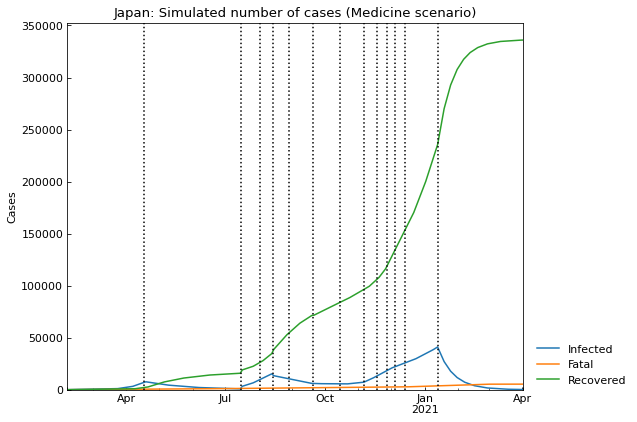

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,341431,5339,220,335872
418,2021-03-30,341453,5340,205,335908
419,2021-03-31,341473,5340,191,335942
420,2021-04-01,341492,5340,178,335974
421,2021-04-02,341510,5341,166,336003


In [20]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [21]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,13th_Rt
Main,142805,02Apr2021,948738,142805,15472,1.19
Medicine,41050,13Jan2021,341510,166,5341,0.60


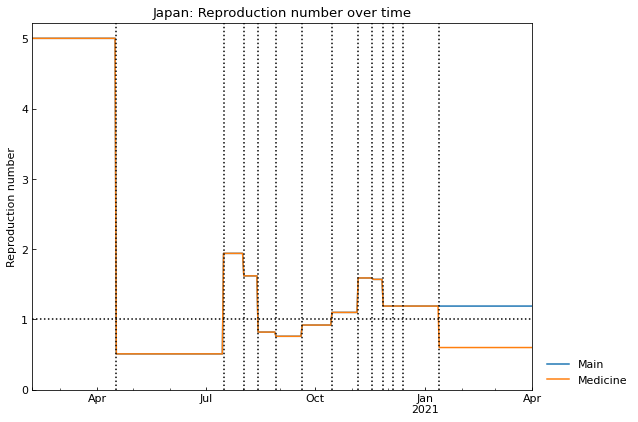

In [22]:
_ = snl.history(target="Rt")

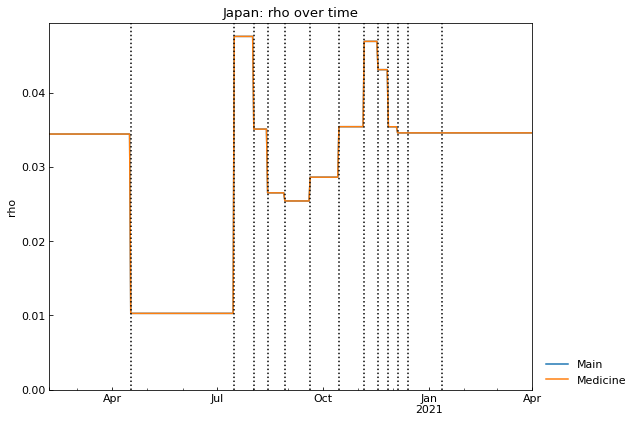

In [23]:
_ = snl.history(target="rho")

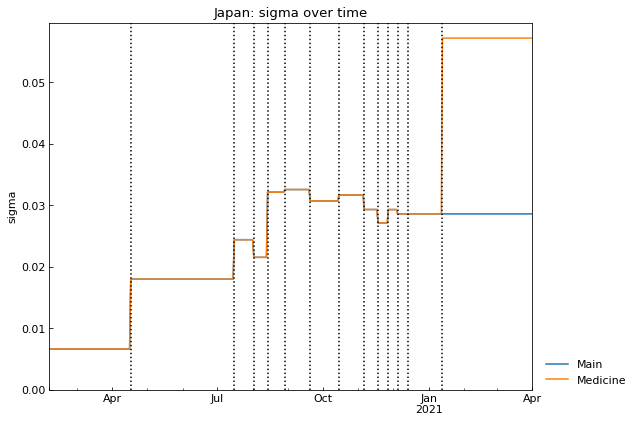

In [24]:
_ = snl.history(target="sigma")

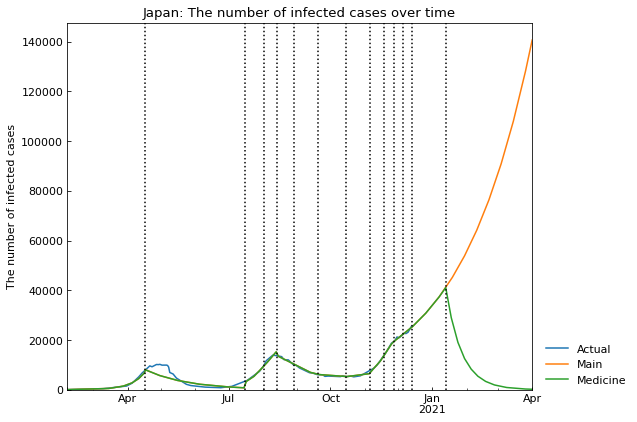

In [25]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

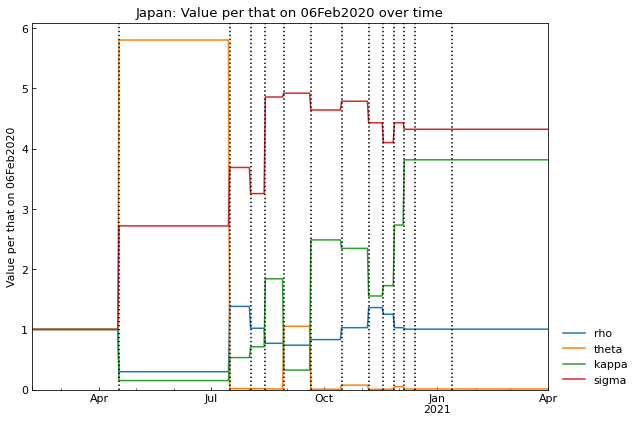

In [26]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [27]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 9th phase (06Feb2020 - 16Apr2020): finished 2815 trials in 3 min  6 sec


	 2nd phase (06Nov2020 - 17Nov2020): finished  365 trials in 0 min 10 sec

	10th phase (16Jul2020 - 01Aug2020): finished  944 trials in 0 min 30 sec

	11th phase (14Aug2020 - 28Aug2020): finished 1201 trials in 0 min 40 sec

	 3rd phase (18Nov2020 - 26Nov2020): finished  362 trials in 0 min 10 sec

	 1st phase (05Dec2020 - 13Dec2020): finished  667 trials in 0 min 20 sec

	 4th phase (01Sep2020 - 19Sep2020): finished  337 trials in 0 min 10 sec

	 5th phase (27Nov2020 - 04Dec2020): finished  926 trials in 0 min 30 sec

	 7th phase (17Apr2020 - 15Jul2020): finished 3413 trials in 3 min  0 sec

	 8th phase (29Aug2020 - 31Aug2020): finished  342 trials in 0 min 10 sec

	 0th phase (20Sep2020 - 14Oct2020): finished 3477 trials in 3 min  0 sec

	 6th phase (02Aug2020 - 13Aug2020): finished 3513 trials in 3 min  0 sec

	12th phase (15Oct2020 - 05Nov2020): finished 3513 trials in 3 min  0 sec

Completed optimization. Total: 7 min 28 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 3rd phase (01Sep2020 - 13Dec2020): finished 11129 trials in 3 min  0 sec

Completed optimization. Total: 3 min  0 sec


In [28]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  16Apr2020  SIR-F  5.00  0.017916  0.000149   
              1st    17Apr2020  15Jul2020  SIR-F  0.51  0.103931  0.000023   
              2nd    16Jul2020  01Aug2020  SIR-F  1.94  0.000344  0.000079   
              3rd    02Aug2020  13Aug2020  SIR-F  1.62  0.000489  0.000106   
              4th    14Aug2020  28Aug2020  SIR-F  0.82  0.000201  0.000273   
              5th    29Aug2020  31Aug2020  SIR-F  0.93  0.007365  0.000180   
              6th    01Sep2020  19Sep2020  SIR-F  0.75  0.002511  0.000463   
              7th    20Sep2020  14Oct2020  SIR-F  0.92  0.000137  0.000369   
              8th    15Oct2020  05Nov2020  SIR-F  1.10  0.001364  0.000348   
              9th    06Nov2020  17Nov2020  SIR-F  1.59  0.000079  0.000231   
              10th   18Nov2020  26Nov2020  SIR-F  1.57  0.000197  0.000257   
              11th   27Nov2020  04Dec2020  SIR-F  1.19  0.000914  0.000406   
              12th   05Dec2020  13Dec2020  SIR-F  1.19  0.000205  0.000567   
Retrospective 0th    06Feb2020  16Apr2020  SIR-F  5.00  0.017916  0.000149   
              1st    17Apr2020  15Jul2020  SIR-F  0.51  0.103931  0.000023   
              2nd    16Jul2020  01Aug2020  SIR-F  1.94  0.000344  0.000079   
              3rd    02Aug2020  13Aug2020  SIR-F  1.62  0.000489  0.000106   
              4th    14Aug2020  28Aug2020  SIR-F  0.82  0.000201  0.000273   
              5th    29Aug2020  31Aug2020  SIR-F  0.93  0.007365  0.000180   
              6th    01Sep2020  13Dec2020  SIR-F  0.93  0.007365  0.000180   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.034414  0.006616  0.258609    2815  3 min  6 sec  
              1st    0.010274  0.017980  0.354287    3413  3 min  0 sec  
              2nd    0.047556  0.024392  0.026211     944  0 min 30 sec  
              3rd    0.035077  0.021526  0.039939    3513  3 min  0 sec  
              4th    0.026499  0.032127  0.015243    1201  0 min 40 sec  
              5th    0.023319  0.024625  0.002907     342  0 min 10 sec  
              6th    0.025949  0.034160  0.019284     337  0 min 10 sec  
              7th    0.028606  0.030697  0.024374    3477  3 min  0 sec  
              8th    0.035405  0.031661  0.028709    3513  3 min  0 sec  
              9th    0.046889  0.029302  0.011004     365  0 min 10 sec  
              10th   0.043082  0.027123  0.026086     362  0 min 10 sec  
              11th   0.035395  0.029295  0.012295     926  0 min 30 sec  
              12th   0.034571  0.028587  0.011356     667  0 min 20 sec  
Retrospective 0th    0.034414  0.006616  0.258609    2815  3 min  6 sec  
              1st    0.010274  0.017980  0.354287    3413  3 min  0 sec  
              2nd    0.047556  0.024392  0.026211     944  0 min 30 sec  
              3rd    0.035077  0.021526  0.039939    3513  3 min  0 sec  
              4th    0.026499  0.032127  0.015243    1201  0 min 40 sec  
              5th    0.023319  0.024625  0.002907     342  0 min 10 sec  
              6th    0.023319  0.024625  0.394550   11129  3 min  0 sec

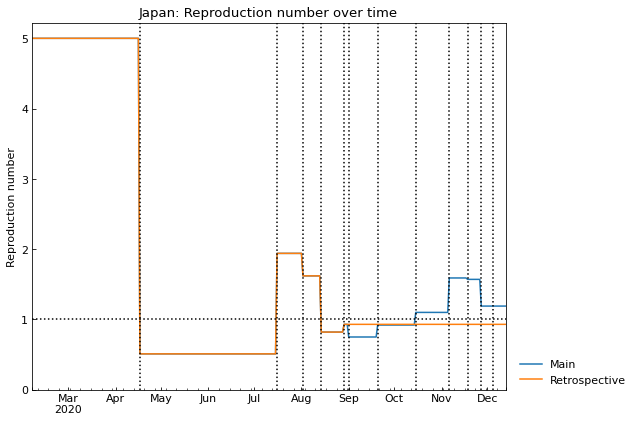

In [29]:
# History of reproduction number
_ = snl_retro.history("Rt")

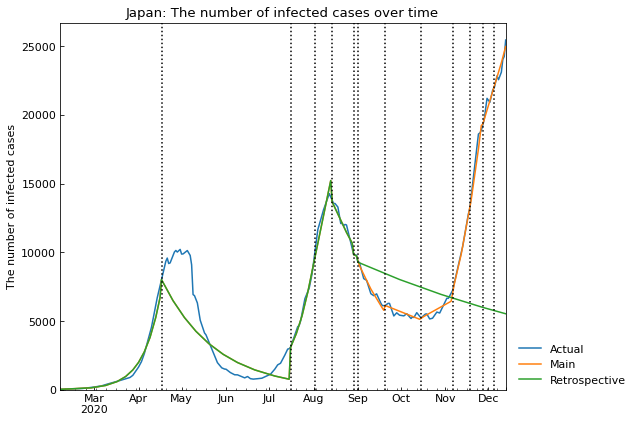

In [30]:
# History of Infected
_ = snl_retro.history("Infected")

In [31]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 14Dec2020,Infected on 14Dec2020,Fatal on 14Dec2020,6th_Rt,7th_Rt,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,25368,14Dec2020,179689,25368,2649,0.75,0.92,1.1,1.59,1.57,1.19,1.19
Retrospective,15215,13Aug2020,120904,5497,2089,0.93,-,-,-,-,-,-
